In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  

import torch
import torch.nn as nn

import torch.optim as optim

import sys
sys.path.insert(0, '../libraries/')

import cifar_data_utils
from cifar_vae_lib import CIFARConditionalVAE
from cifar_classifier_lib import Wide_ResNet
import cifar_semisupervised_lib

import semisupervised_vae_lib as ss_vae_lib

import pickle

# Load data

In [2]:
sys.path.insert(0, '../../../pytorch-vae/')
import utils as default_cifar_vae_utils
import data as default_cifar_vae_data
from tqdm import tqdm

Files already downloaded and verified
Files already downloaded and verified


In [3]:
data_loader = default_cifar_vae_utils.get_data_loader(default_cifar_vae_data.TRAIN_DATASETS['cifar10'], 50)

In [4]:
data_stream = tqdm(enumerate(data_loader, 1))

for batch_index, (x, _) in data_stream:
    data = x
    break

0it [00:00, ?it/s]

In [5]:
def plot_cifar_image(image, fig, label = None, scale = True):
    if scale: 
        image_unscaled = image * cifar_data_utils.CIFAR10_STD_TENSOR + cifar_data_utils.CIFAR10_MEAN_TENSOR
    else: 
        image_unscaled = image

    img = np.dstack((image_unscaled[0, :, :],
                            image_unscaled[1, :, :],
                            image_unscaled[2, :, :]))

    fig.imshow(img)
    
    if label is not None: 
        fig.set_title(cifar_data_utils.cifar100_fine_labels_legend[label])
        

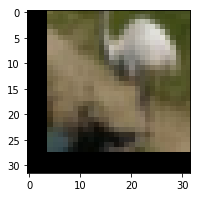

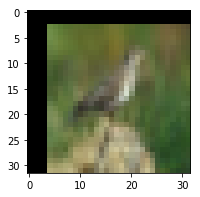

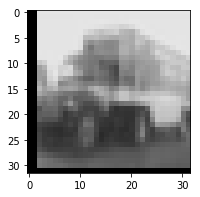

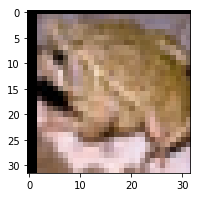

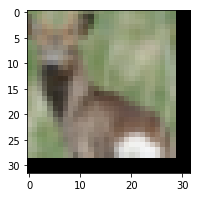

In [6]:
for n in range(5): 
    _, axarr = plt.subplots(1, 1, figsize=(3, 3))

    plot_cifar_image(data[n, :, :, :], axarr, scale = False)

In [7]:
# Load vae

In [8]:
import model as default_cifar_vae_model


In [9]:
model = default_cifar_vae_model.VAE(label = 'cifar10', 
                              image_size = 32, 
                              channel_num = 3, 
                              kernel_num = 128, z_size = 128)

In [10]:
default_cifar_vae_utils.load_checkpoint(model, '../../../pytorch-vae/checkpoints/')

=> loaded checkpoint of VAE-128k-cifar10-3x32x32 from ../../../pytorch-vae/checkpoints/VAE-128k-cifar10-3x32x32


10

In [11]:
_, reonstructed_x = model(data)

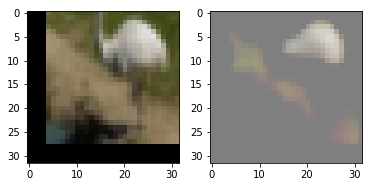

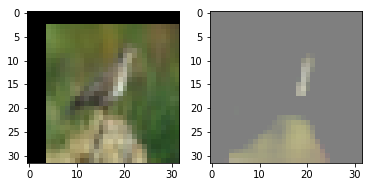

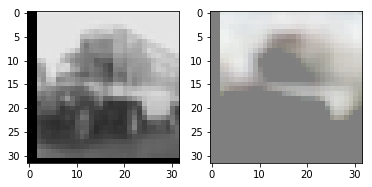

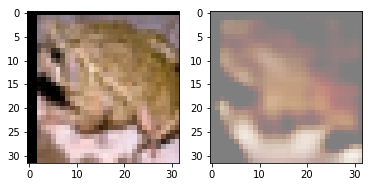

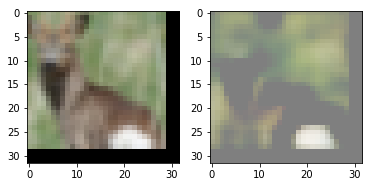

In [12]:
for n in range(5): 
    _, axarr = plt.subplots(1, 2, figsize=(6, 6))
    
    plot_cifar_image(data[n, :, :, :], axarr[0], scale = False)
    plot_cifar_image(reonstructed_x[n, :, :, :].detach(), axarr[1], scale = False)

In [19]:
with open('../cifar10_data/test_batch_cifar10.pkl', 'rb') as f:
    data_labeld_r = pickle.load(f)

In [20]:
image = data_labeld_r['image'] * cifar_data_utils.CIFAR10_STD_TENSOR + \
                          cifar_data_utils.CIFAR10_MEAN_TENSOR

In [40]:
data_labeld_r['image']

tensor([[[[-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
          [-2.4291,  0.1879,  0.2461,  ...,  1.1378,  1.2735,  1.1378],
          [-2.4291,  0.1879,  0.1879,  ...,  0.9633,  1.1378,  1.0796],
          ...,
          [-2.4291,  1.0796,  0.9051,  ...,  0.8664,  0.6725,  1.1378],
          [-2.4291,  1.0408,  1.0214,  ...,  0.8276,  0.7694,  1.4285],
          [-2.4291,  0.8276,  0.8858,  ...,  0.6919,  0.6531,  1.1378]],

         [[-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
          [-2.4183, -0.0582,  0.0204,  ...,  0.9448,  1.0824,  0.9251],
          [-2.4183, -0.0779, -0.0189,  ...,  0.7678,  0.9448,  0.8858],
          ...,
          [-2.4183,  0.8464,  0.5711,  ...,  0.8071,  0.5908,  1.1218],
          [-2.4183,  0.7874,  0.5318,  ...,  0.6694,  0.6301,  1.3971],
          [-2.4183,  0.6301,  0.5908,  ...,  0.4531,  0.4138,  1.0431]],

         [[-2.2214, -2.2214, -2.2214,  ..., -2.2214, -2.2214, -2.2214],
          [-2.2214, -0.2118, -

In [21]:
_, reonstructed_x = model(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

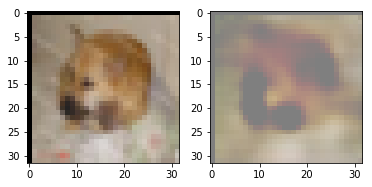

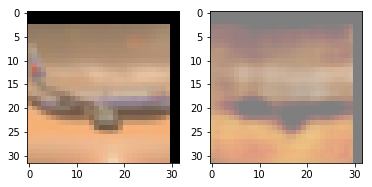

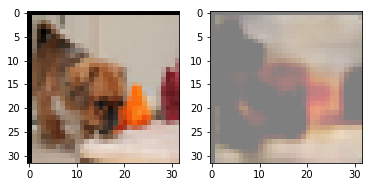

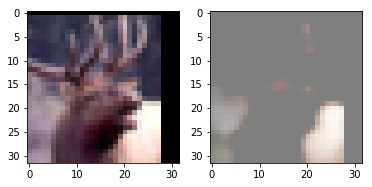

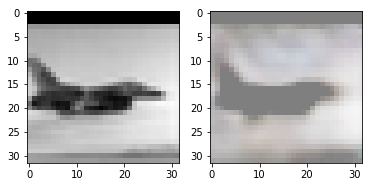

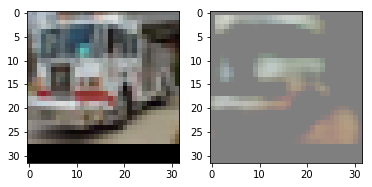

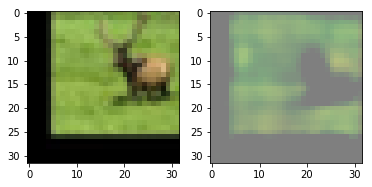

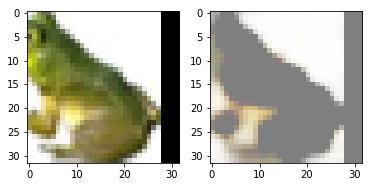

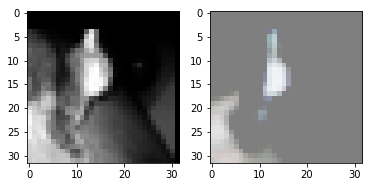

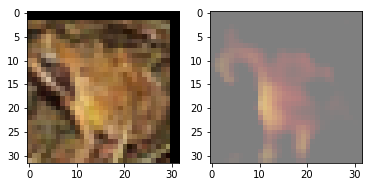

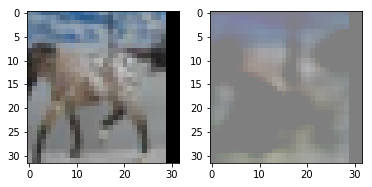

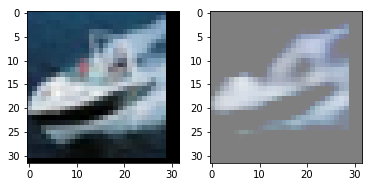

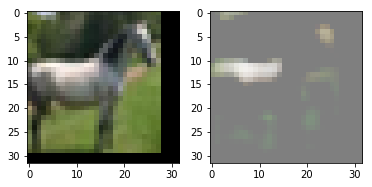

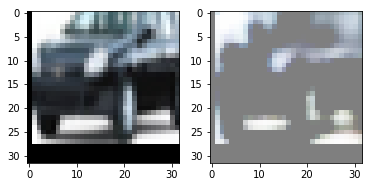

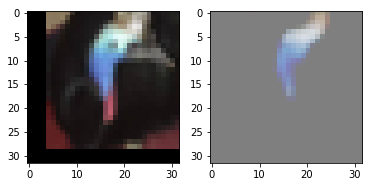

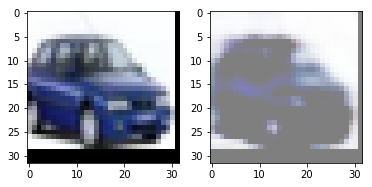

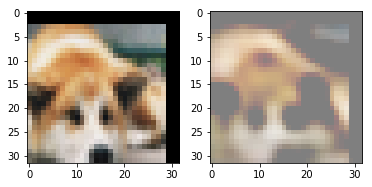

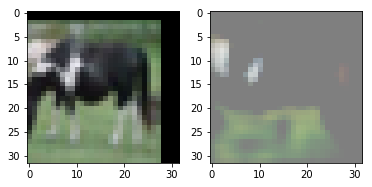

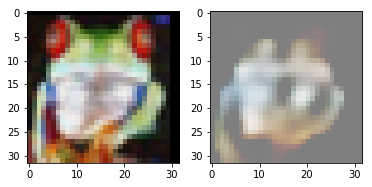

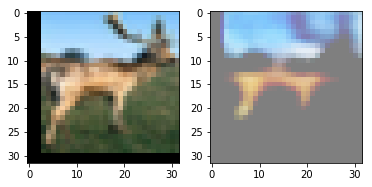

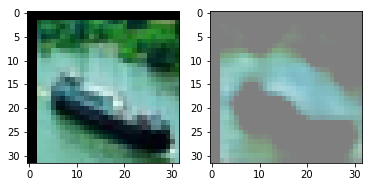

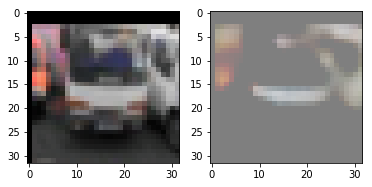

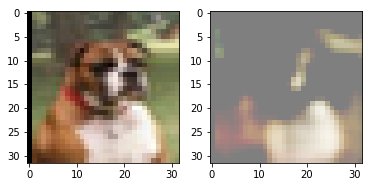

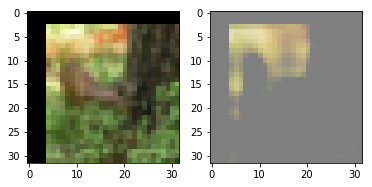

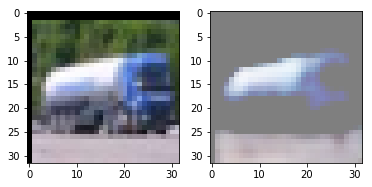

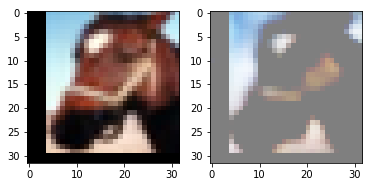

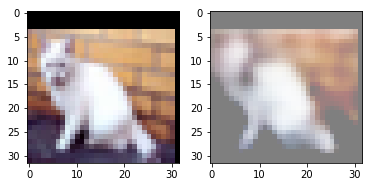

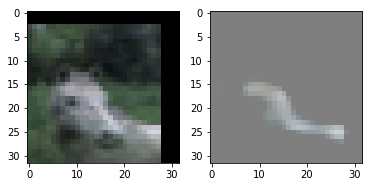

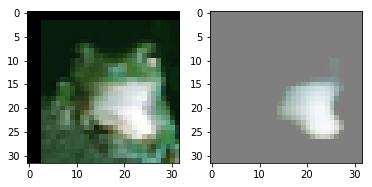

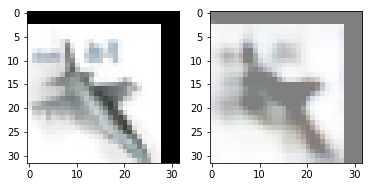

In [30]:
for n in range(30): 
    _, axarr = plt.subplots(1, 2, figsize=(6, 6))
    
    plot_cifar_image(image[n, :, :, :], axarr[0], scale = False)
    plot_cifar_image(reonstructed_x[n, :, :, :].detach(), axarr[1], scale = False)

In [26]:
cifar_semisupervised_lib.cifar_loglik(data_labeld_r['image'], reonstructed_x, None, use_cifar100=False)

tensor([-2043.7604, -1938.3307, -1950.9806, -2023.1815, -1760.0127,
        -2092.2979, -2101.5999, -1503.5248, -2037.7596, -2105.0588,
        -2107.4324, -2014.3984, -2096.0222, -1905.0917, -2099.8223,
        -1554.9480, -1937.0603, -2110.4402, -1975.2070, -1935.4049,
        -2050.3594, -2095.3357, -1980.4753, -2076.5010, -1952.0021,
        -1946.2742, -1798.6558, -2115.3240, -2038.0563, -1176.5823,
        -2066.2476, -1996.0890, -2011.7695, -1994.5607, -2003.2399,
        -1920.8160, -2024.1394, -1946.9473, -2128.0125, -1963.7443,
        -2006.5215, -2129.2896, -2106.2842, -2074.0737, -1407.4587,
        -2099.9949, -2081.3440, -2098.4573, -2033.0348, -1666.5696])

In [29]:
torch.min(reonstructed_x)

tensor(0.5000)

In [31]:
torch.max(reonstructed_x)

tensor(1.0000)

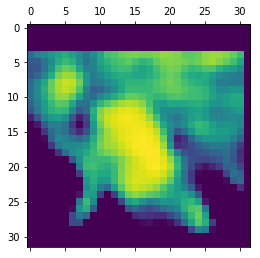

In [32]:
plt.matshow(reonstructed_x[26, 0, :, :].detach())

In [34]:
reonstructed_x[26, 0, 0, 0]

tensor(0.5000)